<a href="https://colab.research.google.com/github/Preranakh/Machine-Learning-Projects/blob/main/AICoE_Workshop2023_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**FIRST AICoE Workshop 2023 - Bootcamp**</font>







## **Getting started with Google Colab**

### **What is Colab?**

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

### **Create/Open notebook**

**Don't need to do this in this bootcamp. This is just for information.**

*   TO CREATE: Go to [https://colab.research.google.com/](https://colab.research.google.com/) and click "New Notebook" button.

*   TO OPEN: Go to https://colab.research.google.com/ and select one of the choices (Recent, Google Drive, Github, Upload)








### **Cells**
A notebook is a list of cells. Cells may contain either text or executable code and its output. Click a cell to select it.

### Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down**.

### Code cells
Below is a **code cell**. You can execute a code cell by clicking the **Play icon** in the left side of the cell.

There are additional options for running some or all cells in the **Runtime** menu.

In [ ]:
a = 10
a

### Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

# Enable GPU/TPU usage

CPUs can process many general tasks. But if your model needs multiple calculations and require parallel computing, then you probably need GPU.

If you need GPU for your programs,

 - Go to "Runtime" -> "Change runtime type" -> Select "GPU"


# Import libraries/install dependencies
A great thing about Google Colab is that it comes with many preinstalled dependencies that are often used.

- to check if the library you’re using is already installed use **!pip show**.
For example, to check which version of pandas you are using you would use **!pip show pandas**
- to import libraries/install dependencies use **!pip install** and **import** commands followed by the libraries/dependencies name.

Any installations only remain for the duration of your session, so if you close the session/notebook, you’ll have to run inline installations whenever you open your project again.

# Libraries for Bootcamp
- **Pandas**: Pandas is a Python library used for working with data sets.
It has functions for analyzing, cleaning, exploring, and manipulating data.
- **NumPy**: NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays.
- **Scikit Learn**: Scikit-learn is a library for the Python programming language that is typically used in machine learning projects. Scikit-learn has simple and efficient tools for predictive data analysis.

# Machine Learning Workflow

- Data Cleaning
  - Problem: Columns that contain a single value
  - Problem: Rows that contain duplicate data
  - Problem: Missing values
  - Problem: Outlier Identification and Removal
- Encoding Data
- Model Building
- Evaluation
- Improving Performance

# Basic Data Cleaning

**-> Breast Cancer Dataset**


Breast cancer dataset classifies breast cancer
patient as either a recurrence or no recurrence of cancer..

In [ ]:
! pip install wget
! python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv" -o breast-cancer.csv

from pandas import read_csv
# load the dataset
df = read_csv('breast-cancer.csv', header=None)
# Peek into the top five rows
df.head()



```
Number of Instances: 289
Number of Attributes: 9 + the class attribute
Attribute Information:   
   0. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   1. menopause: lt40, ge40, premeno.
   2. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   3. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   4. node-caps: yes, no.
   5. deg-malig: 1, 2, 3.
   6. breast: left, right.
   7. breast-quad: left-up, left-low, right-up,	right-low, central.
   8. irradiat:	yes, no.
   9. Class: no-recurrence-events, recurrence-events
Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:
   6.             8
   9.             1.
Class Distribution:
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances
```
You can learn more about the dataset here:
* Breast Cancer Dataset ([breast-cancer.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv))
* Breast Cancer Dataset Description ([breast-cancer.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.names))


The messy dataset was modified from Breast Cancer Dataset.


In [ ]:
! python -m wget "https://raw.githubusercontent.com/pinarkullu/bootcamp2023/main/messy_dataset.csv" -o messy_data.csv

In [ ]:
from pandas import read_csv
# load the dataset
df = read_csv('messy_data.csv', header=None)
# Peek into the top five rows
df.head()

### **Problem: Columns that contain a single value**

We can see that column index 5 only has a single value and should be removed.


In [ ]:
# delete columns with a single unique value
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

df.head()

### **Problem: Rows that contain duplicate data**

In [ ]:
# delete rows of duplicate data from the dataset
print("Before drop_duplicates function, the size of the dataset is")
print(df.shape)
# delete duplicate rows and modify DataFrame rather than creating a new one
df.drop_duplicates(inplace=True)
print("After drop_duplicates function, the size of the dataset is")
print(df.shape)
df.head()

### **Problem: Missing values**

For some columns, a value of zero does not make sense and indicates an invalid or missing value.

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.
Values with a NaN are ignored from operations like sum, count, etc. We can mark values
as NaN easily with the Pandas DataFrame by using the replace() function on a subset of
the columns we are interested in.

In [ ]:
# Marking missing values with nan values
from numpy import nan
from pandas import read_csv
# load the dataset
# dataset = read_csv('messy_data.csv', header=None)
# replace '0' values with 'nan'
df[[6]] = df[[6]].replace(0, nan)
# count the number of nan values in each column
df.head()

### **Problem: Outlier Identification and Removal**

**What are the outliers?**

An outlier is a sample that is exceptionally far from the
mainstream of the data.

Outliers can have many causes, such as:

* Measurement or input error.

* Data corruption.

* True outlier observation.



Next, we can try removing outliers from the training dataset.

We can use Local Outlier Factor algorithm. It is an unsupervised anomaly detection method. It marks each row in the dataset as normal (1) or an outlier (-1). So, we can select all rows that are not outliers.


**Don't need to run this in this bootcamp. This is just for information. We cannot run this on our messy dataset. If you want to run outlier factor algorithm code you should upload another dataset that includes numerical values.**

In [ ]:
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv" -o pima-indians-diabetes.csv

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

from pandas import read_csv
# load the dataset
df = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# identify outliers in the training dataset
# unsupervised anomaly detection method which computes the local density deviation of a given data point
# with respect to its neighbors.
# It considers as outliers the samples that have a substantially lower density than their neighbors.
lof = LocalOutlierFactor()
# Fit the model to the training set X and return the labels.
yhat = lof.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape, y.shape)

#Encoding Data



Machine learning models require all input and output variables to be numeric. This means
that if your data contains categorical data, you must encode it to numbers before you fit
and evaluate a model.

There are three common approaches for converting ordinal and categorical variables to numerical values. They are:    

*   Ordinal Encoding
*   One Hot Encoding
*   Dummy Variable Encoding



    
    


In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
print(dataset.head())
# retrieve the array of data
data = dataset.values
# separate data into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# summarize
print('Input', X.shape)
print('Output', y.shape)

print("\nAfter Ordinal Encoder")
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])


We can encode the features to ordinal encoded integers easily with the OrdinalEncoder of Scikit-learn. This results in a single column of integers between 0 and number of categories per feature.

OrdinalEncoder is for 2D data with the shape (n_samples, n_features)

LabelEncoder is for 1D data with the shape (n_samples,)


### Scaling

Some algorithms are not scale invariant, they behave badly if the individual features do not look like normally distributed data.

Models such linear or logistic regression are typically sensitive to the magnitude or scale of features. Tree based models can still work without feature scaling.

It is highly recommended to normalize and scale down the features with feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
print("Before feature scaling:")
print(X[:2, :])
sc = StandardScaler()
X = sc.fit_transform(X)
print("\nAfter feature scaling:")
print(X[:2, :])

The entire data set scales with a zero mean and unit variance.

# Model Building and Evaluation

You are ready to build your machine learning model.

###Import “Breast Cancer Wisconsin” dataset

The dataset can be found in *sklearn.datasets*.

Use "load_DATASET()" function to upload your dataset, where DATASET refers to the name of the dataset.

You can find detailed information about *sklearn.datasets*, click [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [ ]:
from sklearn import datasets, metrics
bc = datasets.load_breast_cancer()

All of Scikit-Learn datasets are divided into data and target.
- data represents the features, which are the variables that help the model learn how to predict.
- target includes the actual labels.

In our case, the target data is one column classifies the tumor as either 0 indicating spreading or 1 for non-spreading.

### Train & Test Datasets
First, let’s split the dataset into two, one for training the model — giving it data to learn from, and the second for testing the model — seeing how well the model performs on data (scans) it hasn’t seen before.

In [ ]:
# Store the feature data
X = bc.data
# store the target data
y = bc.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
# test_size represents the proportion of the dataset to include in the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

This gives us two datasets —one for training and one for testing.



Now we're ready to build a model that classifies cancer tumors as spreading or non-spreading. This will show you how to use the data for your own models.

We’ll build a simple Support vector machine model.

The Support Vector Machine is a supervised learning algorithm mostly used for classification, but it can be used also for regression. The main idea is that based on the labeled data the algorithm tries to construct the optimal hyperplane which can be used to classify new data points.


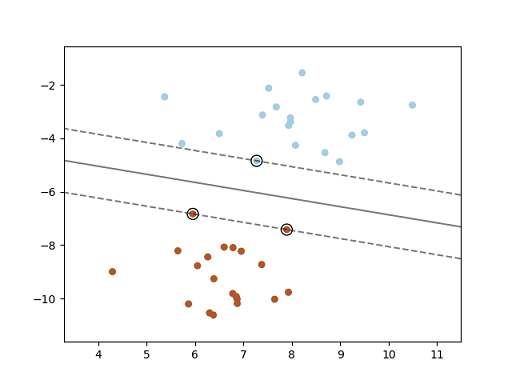

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
# Applying the support vector classification method
svc = SVC(kernel="linear")

# Fit the support vector classifier from the training dataset.
svc.fit(X_train, y_train)

# Predict the labels for the test data on the basis of the trained model
y_pred = svc.predict(X_test)

There are several learning methods under the Scikit-learn library. For detailed information about supervised methods click: https://scikit-learn.org/stable/supervised_learning.html and for unsupervised methods click: https://scikit-learn.org/stable/unsupervised_learning.html



## Classification Model Evaluation Metrics

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Display the confusion matrix for the model predictions on the test dataset.
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

We can see that out of
60 observations with label 0 (spreading), our model has correctly predicted 57 observations. Similarly out of
111 observations with label 1 (non-spreading), our model has correctly predicted 106 observations.

It is important to look at the distribution of misclassifications across classes to validate a trained model. Confusion matrix is a good way to see.

Confusion matrix is useful for measuring some other evaluation methods such as Recall, Precision, and Accuracy.

### True Positive, False Positive, True Negative and False Negative

In [ ]:
# True Positive (TP): This is the count of the total number of instances from the
#positive class where the true class label was equal to the predicted class label.
TP = 106

# False Positive (FP): This is the count of the total number of instances from the
#negative class where our model misclassified them by predicting them as positive.
FP = 5

# True Negative (FN): This is the count of the total number of instances from the
# negative class where the true class label was equal to the predicted class label.
TN = 57

# False Negative (FN): This is the count of the total number of instances from the
# positive class where our model misclassified them by predicting them as negative.
FN = 3

### Accuracy

This is one of the most popular measures of classifier performance. It is defined as the overall proportion of correct predictions of the model. The formula for computing accuracy from the
confusion matrix is:

$Accurcy=\frac{TP+TN}{TP+FP+TN+FN}$

In [ ]:
fw_acc = round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

### Precision

Precision, also known as positive predictive value, is another metric that can be derived from
the confusion matrix. It shows from all the classes we have predicted as positive, how many are actually positive. It is usable if you want your model to be as correct as possible when it says positive and don’t care too much when it predicts negative. The formula for precision is as follows:

$Precision=\frac{TP}{TP+FP}$

Precision becomes important in cases where we are more concerned about finding
the maximum number of positive class even if the total accuracy reduces.

In [ ]:
fw_prec = round(metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

### Recall

Recall, also known as sensitivity, is defined as the number of instances of the positive class that were correctly predicted. This is
also known as hit rate, coverage, or sensitivity. The formula for recall is:

$Recall=\frac{TP}{TP+FN}$

Common use of recall is disease detection. If somebody is ill, we need to spot their illness avoiding the false negatives. A false negative patient may become contagious and it’s not safe.

In [ ]:
fw_rec = round(metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

These are common evaluation methods for classification models. You can find detailed list [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

# Improving Performance

To improve performance of your model, try the following strategies

**Strategy 1: Play with data (following are some methods)**
- Get more data
- Clean your data
- Rescale your data
- Feature selection
- Feature Engineering - change feature extraction method if any

**Strategy 2: Avoid overfitting (following are some methods)**

Two important methods that you can use when evaluating machine learning algorithms to limit overfitting:
- Hold a validation dataset.
- Use a resampling technique to estimate model accuracy: uses the same data to build different models and also tune their hyperparameters using a simple data partitioning strategy.

**Strategy 3: Change hyperparameters**

- Hyperparameters are meta parameters that are associated with any ML algorithm and are usually set before the model training and building process.

- Example hyperparameters in ML algorithms

    For Support Vector Machine: Different Kernels

    For Neural networks: Number of hidden layers and units, Learning rate, Dropout rate, Number of epochs, Batch size

**Strategy 4: Try Different Algorithm**

Change your Machine Learning algorithm.

**Strategy 5: Ensemble Models**

Combine the predictions of multiple well-performing models.

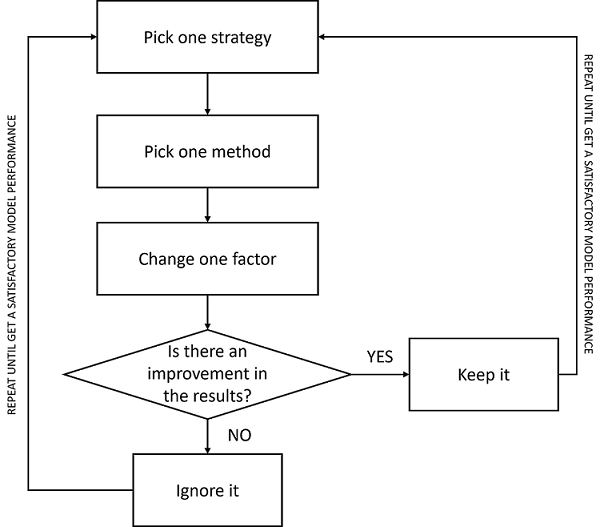

# Uploading your data

**Don't need to do this in this bootcamp. This is just for information.**

There are different options to upload your data to the Colab space.  


*   You can use wget command-line tool to upload files from given URL.









*   You can upload files from your local file system



In [ ]:
from google.colab import files
uploaded = files.upload()

*   You can put your files into your drive and mount your Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





# References



- Adapted from Workshop hosted by the UD Chemistry-Biology Interface Program and Center for Bioinformatics and Computational Biology (The Practical AI/ML for Computational Biology and Chemistry Workshop materials are licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).)

- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.